In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import sympy
import scipy
import scipy.optimize
import sys

sys.path.insert(0, '../')
from pyecca.control.time_allocation import find_cost_function, compute_trajectory
import matplotlib.pyplot as plt

In [2]:
n_legs = 6
poly_deg = 7
min_deriv = 4  # min snap
bc_deriv = 4
cost = find_cost_function(
    poly_deg=poly_deg,
    min_deriv=min_deriv,
    rows_free=[],
    n_legs=n_legs,
    bc_deriv=bc_deriv,
)

T_opt [1.11613105 1.03511885 0.8375382  0.8375382  1.03511885 1.11613103]


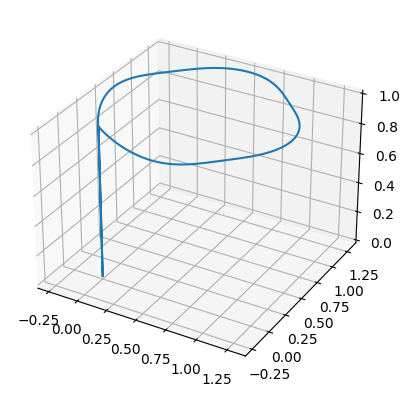

In [3]:
n_dim = 3
k_time = 1e5  # weight on time
bc = np.array(
    [  # boundary conditions
        [
            [0, 0, 0],
            [0, 0, 1],
            [1, 0, 1],
            [1, 1, 1],
            [0, 1, 1],
            [0, 0, 1],
            [0, 0, 0],
        ],  # pos
        [
            [0, 0, 0],
            [0, 0, 0],
            [1, 1, 0],
            [-1, 1, 0],
            [-1, -1, 0],
            [0, 0, 0],
            [0, 0, 0],
        ],  # vel
        [
            [0, 0, 0],
            [0, 0, 0],
            [0, 0, 0],
            [0, 0, 0],
            [0, 0, 0],
            [0, 0, 0],
            [0, 0, 0],
        ],  # acc
        [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]],
    ]  # jerk
)
assert bc.shape[1] - 1 == n_legs
f_cost = lambda T: sum([cost["f_J"](T, bc[:, :, d], k_time) for d in range(n_dim)])

sol = scipy.optimize.minimize(
    fun=f_cost, x0=[10] * n_legs, bounds=[(0.1, 100)] * n_legs
)

T_opt = sol["x"]

print("T_opt", T_opt)

opt_x = cost["f_p"](T_opt, bc[:, :, 0], k_time)
opt_y = cost["f_p"](T_opt, bc[:, :, 1], k_time)
opt_z = cost["f_p"](T_opt, bc[:, :, 2], k_time)


def plot_traj(deriv=0):
    traj_x = compute_trajectory(opt_x, T_opt, poly_deg=poly_deg, deriv=deriv)
    traj_y = compute_trajectory(opt_y, T_opt, poly_deg=poly_deg, deriv=deriv)
    traj_z = compute_trajectory(opt_z, T_opt, poly_deg=poly_deg, deriv=deriv)
    plt.plot(traj_x["t"], traj_x["x"], label="x")
    plt.plot(traj_y["t"], traj_y["x"], label="y")
    plt.plot(traj_z["t"], traj_z["x"], label="z")
    plt.legend()


fig = plt.figure()
traj_x = compute_trajectory(opt_x, T_opt, poly_deg=poly_deg, deriv=0)
traj_y = compute_trajectory(opt_y, T_opt, poly_deg=poly_deg, deriv=0)
traj_z = compute_trajectory(opt_z, T_opt, poly_deg=poly_deg, deriv=0)
ax = fig.add_subplot(111, projection="3d")
ax.plot(traj_x["x"], traj_y["x"], traj_z["x"]);

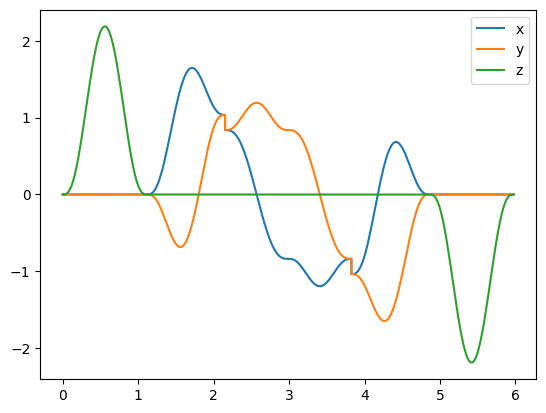

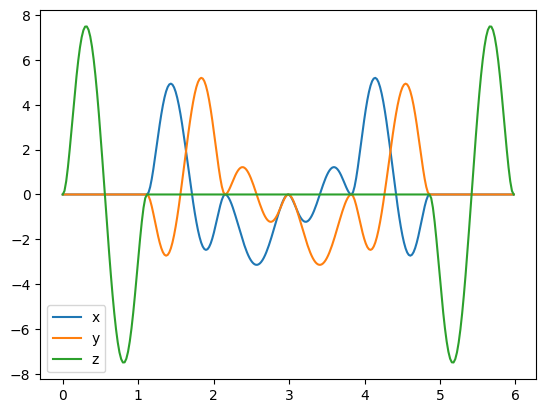

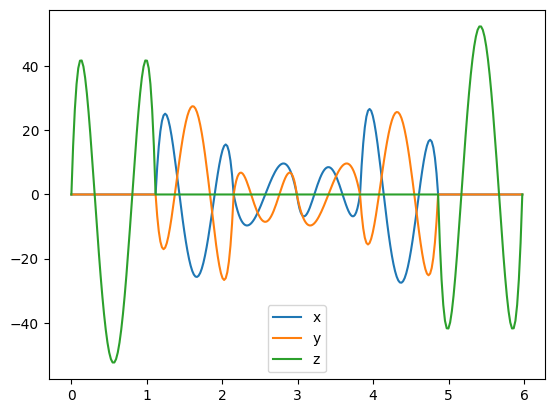

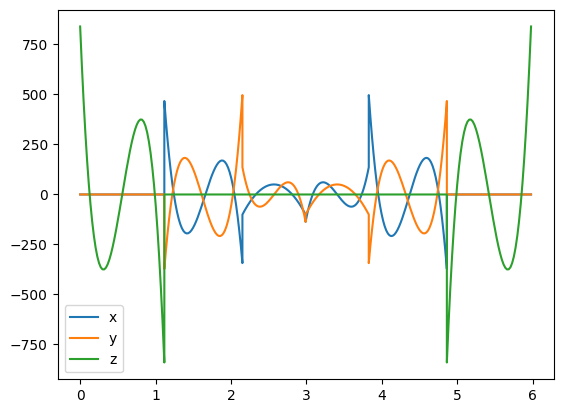

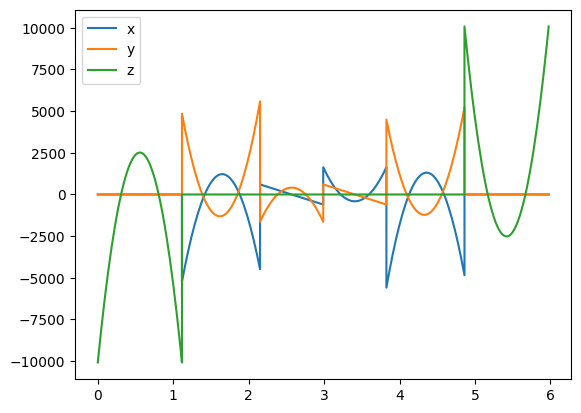

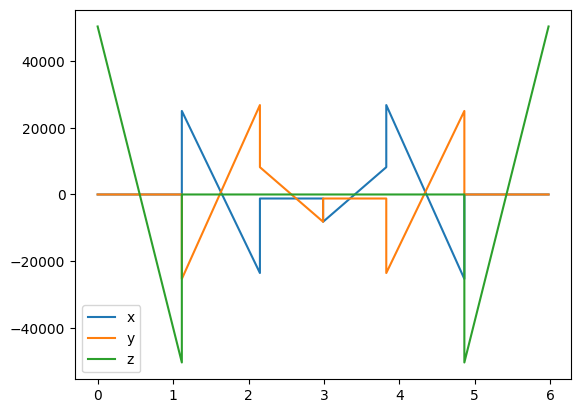

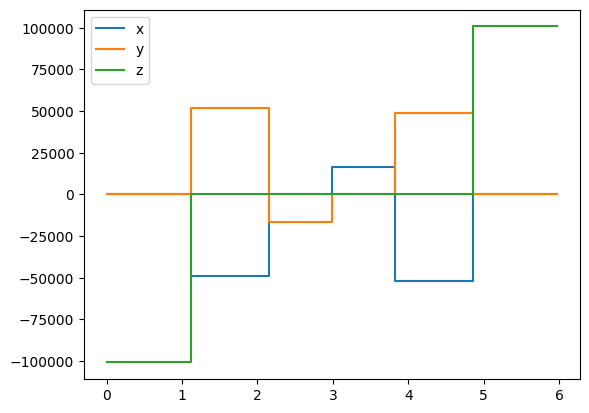

In [4]:
for i in range(1, poly_deg + 1):
    plt.figure()
    plot_traj(deriv=i)